<a href="https://colab.research.google.com/github/Alwin-John10/Leaf-Disease-Detection-and-Correction-using-YOLOV7-with-GPT3-Integrated/blob/main/Leaf_disease_detection_yolo_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download YOLOv7 repository and install requirements
!git clone -qq https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -qq -r requirements.txt

/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="asdfghj")
project = rf.workspace("sdfgh").project("fghj")
dataset = project.version(6).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=7f5a996a2531b5c1ac797c3456c8d0804998263a2d0c3ac1d3ce5dd376941ddb
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PlantLeaf-6 in yolov7pytorch:: 100%|██████████| 5512/5512 [00:01<00:00, 3363.59it/s]


In [ ]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget -qq ".pt"

/content/yolov7


In [ ]:
!nvidia-smi

Mon May 29 09:06:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# run this cell to begin training
%cd /content/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 150 --data {dataset.location}/data.yaml --weights '/path' --device 0

/content/yolov7
2023-05-27 08:57:10.949432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 08:57:12.076602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='/content/drive/MyDrive/project/last.pt', cfg='cfg/training/yolov7.yaml', data='/content/yolov7/PlantLeaf-6/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=150, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='ru

In [ ]:
!cp "/content/yolov7/runs/train/exp/weights/last.pt" -r "/content/drive/MyDrive/project"

cp: cannot stat '/content/yolov7/runs/train/exp/weights/last.pt': No such file or directory


In [ ]:
# Run evaluation
!python detect.py --weights /content/drive/MyDrive/project/last.pt --conf 0.5 --source {dataset.location}/test/images --save-txt

Namespace(weights=['/content/drive/MyDrive/project/last.pt'], source='/content/yolov7/PlantLeaf-6/test/images', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 2.0.1+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36530318 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

3 Gr

In [ ]:
import os
import pandas as pd

test_folder = '/path'  # Provide the path to the folder containing test labels
pred_folder = '/path' # Provide the path to the folder containing predicted labels

df = pd.DataFrame(columns=['filename', 'test_label', 'predicted_label'])

test_files = os.listdir(test_folder)

for file in test_files:
    test_file_path = os.path.join(test_folder, file)
    pred_file_path = os.path.join(pred_folder, file)

    with open(test_file_path, 'r') as test_file:
        test_lines = test_file.readlines()

        if os.path.isfile(pred_file_path):
            with open(pred_file_path, 'r') as pred_file:
                pred_lines = pred_file.readlines()
        else:
            pred_lines = []

        for i in range(len(test_lines)):
            test_line = test_lines[i].strip().split()

            test_label = test_line[0]
            pred_label = pred_lines[i].strip().split()[0] if i < len(pred_lines) else None

            df = df.append({'filename': file, 'test_label': test_label, 'predicted_label': pred_label}, ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

In [ ]:
df

NameError: ignored

In [ ]:
label_mapping = {
'0': 'Black gram_healthy',
'1': 'Black gram_leaf spot',
'2': 'Dolicos bean_cercospora leaf spot',
'3': 'Dolicos bean_healthy',
'4': 'Ground nut_healthy',
'5':'Ground nut_tikka leaf spot',
'6': 'millet_healthy',
'7': 'millet_rust',
'8': 'tomato_early blight',
'9': 'tomato_healthy',
'None':'None'
}
df2= df.copy()
df2.test_label = [label_mapping[str(i)] for i in df.test_label]
df2.predicted_label = [label_mapping[str(i)] for i in df.predicted_label]
df2 = df2[~df2.apply(lambda row: 'None' in row.values, axis=1)]
df2.head()

,filename,test_label,predicted_label
0,IMG_6297_JPG.rf.68dd46f50b110c683f83c22ed7be6f...,millet_healthy,millet_healthy
1,IMG_6049_JPG.rf.0180d5e5fd4d36f10b7184e66716e3...,millet_rust,millet_rust
2,DSCN0357_JPG.rf.1dc21580431adb296e454c0f7d41e3...,Ground nut_healthy,Ground nut_healthy
3,DSCN0357_JPG.rf.1dc21580431adb296e454c0f7d41e3...,Ground nut_healthy,Ground nut_healthy
4,DSCN0357_JPG.rf.1dc21580431adb296e454c0f7d41e3...,Ground nut_healthy,Ground nut_healthy


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


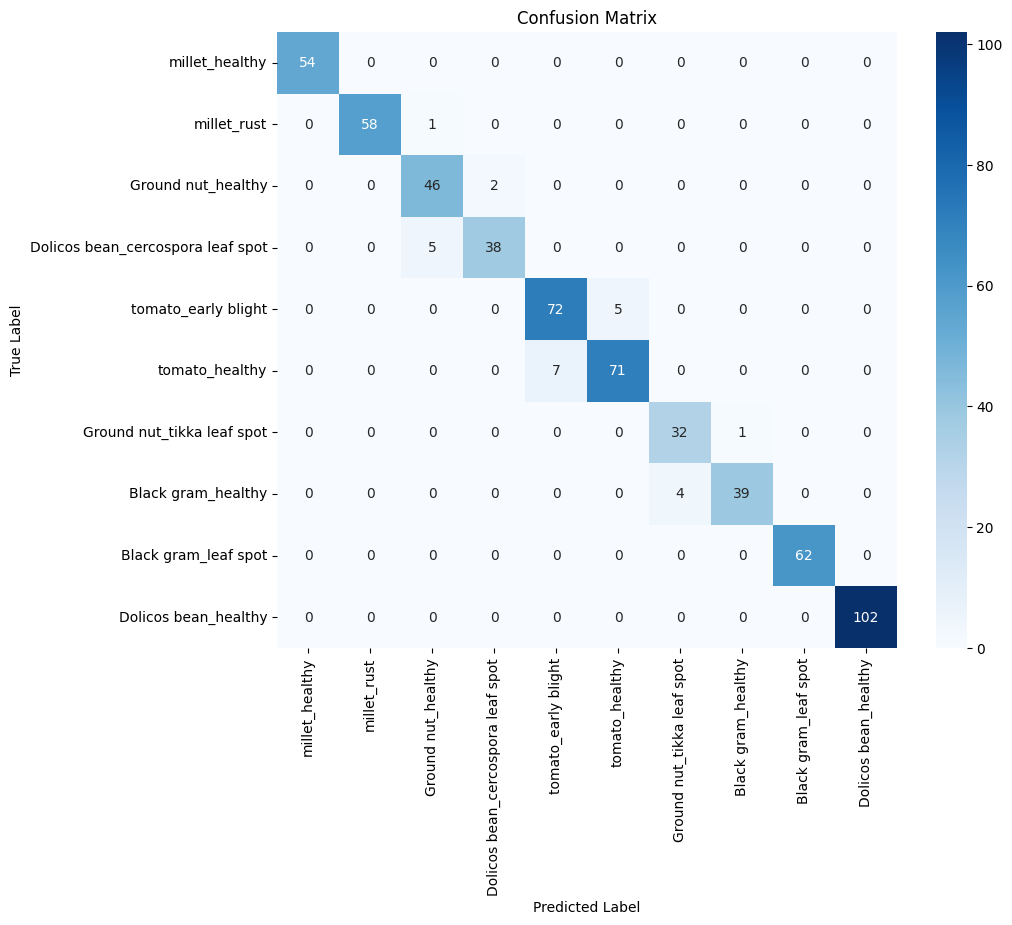

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(df2['test_label'], df2['predicted_label'])

# Get unique labels
labels = df2['test_label'].append(df2['predicted_label']).unique()

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [ ]:
 from sklearn.metrics import accuracy_score, classification_report
accuracy_score(df2['test_label'], df2['predicted_label'])

0.9582637729549248

In [ ]:
# Generate classification report
report = classification_report(df2['test_label'], df2['predicted_label'])
# Print the classification report
print(report)

                                   precision    recall  f1-score   support

               Black gram_healthy       1.00      1.00      1.00        54
             Black gram_leaf spot       1.00      0.98      0.99        59
Dolicos bean_cercospora leaf spot       0.88      0.96      0.92        48
             Dolicos bean_healthy       0.95      0.88      0.92        43
               Ground nut_healthy       0.91      0.94      0.92        77
       Ground nut_tikka leaf spot       0.93      0.91      0.92        78
                   millet_healthy       0.89      0.97      0.93        33
                      millet_rust       0.97      0.91      0.94        43
              tomato_early blight       1.00      1.00      1.00        62
                   tomato_healthy       1.00      1.00      1.00       102

                         accuracy                           0.96       599
                        macro avg       0.95      0.95      0.95       599
                     we

In [ ]:
import os
import sys
sys.path.append('path')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel


def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

In [ ]:
classes_to_filter = None  #You can give list of classes to filter by name, Be happy you don't have to put class number. ['train','person' ]


opt  = {

    "weights": "patht", # Path to weights file default weights are for nano model
    "yaml"   : "path.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.3, # confidence threshold for inference.
    "iou-thres" : 0.45, # NMS IoU threshold for inference.
    "device" : '0',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : classes_to_filter  # list of classes to filter or None

}

In [ ]:
source_image_path = 'path'
#Change the Path Name to your file name.

In [ ]:
# Give path of source image.
#%cd /content/gdrive/MyDrive/yolov7
#source_image_path = '/content/trash.png'

with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img = img.half() if half else img.float()  # uint8 to fp16/32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # Inference
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]

  # Apply NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # detections per class
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=2)
        print(label)

AssertionError: ignored

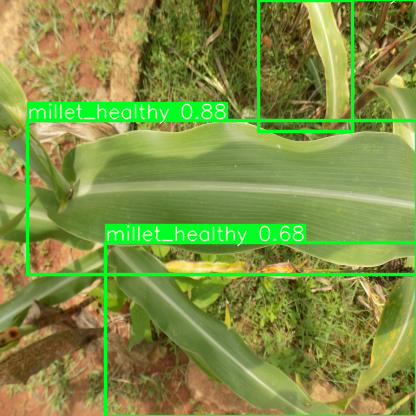

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img0)

In [ ]:
#give the full path to video, your video will be in the Yolov7 folder
video_path = "video path" #/content/drive/MyDrive/agrbot yolov7/septoria leaves.mp4'

In [ ]:
# Initializing video object
video = cv2.VideoCapture(video_path)


#Video information
fps = video.get(cv2.CAP_PROP_FPS)
w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
nframes = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialzing object for writing video output
output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'),fps , (w,h))
torch.cuda.empty_cache()
# Initializing model and setting it for inference
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:
      classes.append(opt['classes'].index(class_name))

  for j in range(nframes):

      ret, img0 = video.read()
      if ret:
        img = letterbox(img0, imgsz, stride=stride)[0]
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
        img = np.ascontiguousarray(img)
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
          img = img.unsqueeze(0)

        # Inference
        t1 = time_synchronized()
        pred = model(img, augment= False)[0]


        pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
        t2 = time_synchronized()
        for i, det in enumerate(pred):
          s = ''
          s += '%gx%g ' % img.shape[2:]  # print string
          gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
          if len(det):
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

            for c in det[:, -1].unique():
              n = (det[:, -1] == c).sum()  # detections per class
              s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

            for *xyxy, conf, cls in reversed(det):

              label = f'{names[int(cls)]} {conf:.2f}'
              plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)

        print(f"{j+1}/{nframes} frames processed")
        output.write(img0)
      else:
        break


output.release()
video.release()

AssertionError: ignored

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'v_path'

# Compressed video path
compressed_path = "v_path"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
!cp "/content/yolov7/output.mp4" -r "/content/drive/MyDrive/project"